In [7]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gensim
import string 
import math
import nltk
import pickle

from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

# Import pyLDAvis.gensim or pyLDAvis.gensim_models is dependent on the version of gensim you are using
# import pyLDAvis.gensim
import pyLDAvis.gensim_models

from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models  
from pprint import pprint
from collections import Counter
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("../../data/addedsw2_winemag-data-130k-v2-clean-desc-ngram-pos.csv")
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,variety,winery,ratings,ratings_label,cleaned_text,bigram_cleaned_review,trigram_cleaned_review,unigram_cleaned_review_noun_verbs_only,bigram_cleaned_review_noun_verbs_only,trigram_cleaned_review_noun_verbs_only
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,good,2.0,aroma include tropical broom brimstone dried h...,aroma include tropical broom brimstone dried h...,aroma include tropical broom brimstone dried h...,aroma include broom brimstone dried offering a...,aroma include broom brimstone dried offering a...,aroma include broom brimstone dried offering a...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,good,2.0,ripe smooth still structured firm filled juicy...,ripe smooth still structured firm filled juicy...,ripe smooth still structured firm filled juicy...,ripe firm filled juicy berry fruit freshened a...,ripe firm filled juicy berry fruit freshened a...,ripe firm filled juicy berry fruit freshened a...
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,good,2.0,tart snappy lime flesh rind dominate green pin...,tart snappy lime flesh_rind dominate green pin...,tart snappy lime flesh_rind dominate green pin...,tart lime rind dominate pineapple poke acidity...,tart lime flesh_rind dominate pineapple poke a...,tart lime flesh_rind dominate pineapple poke a...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,Riesling,St. Julian,good,2.0,pineapple rind lemon pith orange blossom start...,pineapple rind lemon pith orange_blossom start...,pineapple rind lemon pith orange_blossom start...,pineapple rind lemon pith orange start aroma g...,pineapple rind lemon pith start aroma guava ma...,pineapple rind lemon pith start aroma guava ma...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,good,2.0,much regular come across rather rough tannic r...,much regular come_across rather rough tannic r...,much regular come_across rather rough tannic r...,earthy think country companion hearty winter stew,come_across earthy think country companion hea...,come_across earthy think country companion hea...


In [11]:
full_records_cleaned_text_bigram = df['bigram_cleaned_review_noun_verbs_only'].values.tolist()

full_cleaned_bigram_text_list_split = [str(d).split() for d in full_records_cleaned_text_bigram]

dictionary_full_bigram = gensim.corpora.Dictionary(full_cleaned_bigram_text_list_split)

full_bigram_bow_corpus = [dictionary_full_bigram.doc2bow(doc) for doc in full_cleaned_bigram_text_list_split]

In [12]:
tfidf_bigram_model = models.TfidfModel(full_bigram_bow_corpus)
corpus_tfidf_bigram = tfidf_bigram_model[full_bigram_bow_corpus]

In [29]:
model_topics = []
model_list = []
coherence_values = []

for num_topics in range(2, 12, 2):
    bigram_lda_tfidf_model= gensim.models.LdaMulticore(corpus=corpus_tfidf_bigram, num_topics=num_topics, id2word=dictionary_full_bigram, passes=2, workers=4,  random_state=100)
    coherencemodel = CoherenceModel(model=bigram_lda_tfidf_model, texts=full_cleaned_bigram_text_list_split, dictionary=dictionary_full_bigram, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(bigram_lda_tfidf_model)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

#Topics: 2 Score: 0.3393118896254922
#Topics: 4 Score: 0.4002247204850655
#Topics: 6 Score: 0.36924165105284207
#Topics: 8 Score: 0.41895350601430414
#Topics: 10 Score: 0.435205890963209


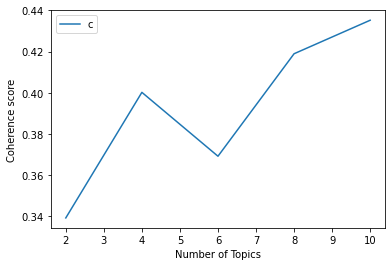

In [31]:
# Show graph
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## 6 Topics

In [13]:
topics6_lda_tfidf_bigram_full_model = gensim.models.LdaMulticore(corpus=corpus_tfidf_bigram, num_topics=6, id2word=dictionary_full_bigram, passes=2, workers=2, random_state=100)

In [14]:
# Visualize the topics - 6 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topics6_lda_tfidf_bigram_full_model, full_bigram_bow_corpus, dictionary_full_bigram)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.123291  0.133912       1        1  34.870262
0     -0.094262 -0.225525       2        1  16.327364
1     -0.148019  0.057038       3        1  15.662034
4      0.107460 -0.022963       4        1  14.918764
5      0.148462 -0.003783       5        1  11.730413
2      0.109650  0.061322       6        1   6.491163, topic_info=           Term          Freq         Total Category  logprob  loglift
15        fruit   8003.000000   8003.000000  Default  30.0000  30.0000
1         apple   6922.000000   6922.000000  Default  29.0000  29.0000
88   aftertaste   3032.000000   3032.000000  Default  28.0000  28.0000
67        peach   5071.000000   5071.000000  Default  27.0000  27.0000
0       acidity  11590.000000  11590.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
275       color    203.013290   2506.849609   Topic6  -6.1840   0.2212
52    raspberry    222.314499   6231.493164   Topic6  -6.0932  -0.5985
97          oak    216.999847   6534.515137   Topic6  -6.1174  -0.6702
11        berry    215.728668   8431.850586   Topic6  -6.1232  -0.9310
54        spicy    202.839539   4761.977539   Topic6  -6.1848  -0.4213

[512 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3104      1  0.006322  acacia
3104      2  0.006322  acacia
3104      3  0.006322  acacia
3104      4  0.006322  acacia
3104      5  0.979938  acacia
...     ...       ...     ...
2317      1  0.010460    zing
2317      2  0.005230    zing
2317      3  0.052300    zing
2317      4  0.930941    zing
2317      5  0.005230    zing

[2333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 6, 3])

## 5 Topics

In [15]:
topics5_lda_tfidf_bigram_full_model = gensim.models.LdaMulticore(corpus=corpus_tfidf_bigram, num_topics=5, id2word=dictionary_full_bigram, passes=2, workers=4, random_state=100)

In [27]:
coherencemodel_5 = CoherenceModel(topics5_lda_tfidf_bigram_full_model, texts=full_cleaned_bigram_text_list_split, dictionary=dictionary_full_bigram, coherence='c_v')
coherencemodel_5.get_coherence()

0.41183953133787565

In [16]:
# Visualize the topics - 5 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topics5_lda_tfidf_bigram_full_model, full_bigram_bow_corpus, dictionary_full_bigram)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.132700  0.049562       1        1  28.877085
2      0.038081 -0.124444       2        1  20.835310
1     -0.064103  0.070917       3        1  19.394997
0      0.162995  0.094930       4        1  17.792278
4     -0.004274 -0.090965       5        1  13.100332, topic_info=           Term          Freq         Total Category  logprob  loglift
15        fruit   7601.000000   7601.000000  Default  30.0000  30.0000
88   aftertaste   2937.000000   2937.000000  Default  29.0000  29.0000
1         apple   7210.000000   7210.000000  Default  28.0000  28.0000
67        peach   5378.000000   5378.000000  Default  27.0000  27.0000
0       acidity  11471.000000  11471.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
370  strawberry    548.911987   3028.262207   Topic5  -5.8914   0.3247
67        peach    597.217529   5378.491211   Topic5  -5.8070  -0.1653
48         herb    595.239746   5288.526855   Topic5  -5.8104  -0.1518
568        make    548.043152   3879.283936   Topic5  -5.8930   0.0755
298   mouthfeel    517.335510   3240.559082   Topic5  -5.9506   0.1977

[476 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2542      1  0.006376  acacia_flower
2542      2  0.956414  acacia_flower
2542      3  0.006376  acacia_flower
2542      4  0.025504  acacia_flower
2542      5  0.006376  acacia_flower
...     ...       ...            ...
4242      1  0.023041            zip
4242      2  0.960022            zip
4242      3  0.007680            zip
4242      4  0.007680            zip
4242      5  0.007680            zip

[1965 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

## 4 Topics

In [17]:
topics4_lda_tfidf_bigram_full_model = gensim.models.LdaMulticore(corpus=corpus_tfidf_bigram, num_topics=4, id2word=dictionary_full_bigram, passes=2, workers=4, random_state=100)

In [18]:
# Visualize the topics - 4 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topics4_lda_tfidf_bigram_full_model, full_bigram_bow_corpus, dictionary_full_bigram)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.127924  0.027798       1        1  35.377563
2      0.015255 -0.137976       2        1  24.529430
0      0.150168  0.052180       3        1  21.092213
1     -0.037499  0.057999       4        1  19.000786, topic_info=           Term          Freq         Total Category  logprob  loglift
15        fruit   7499.000000   7499.000000  Default  30.0000  30.0000
88   aftertaste   2875.000000   2875.000000  Default  29.0000  29.0000
1         apple   7039.000000   7039.000000  Default  28.0000  28.0000
0       acidity  11250.000000  11250.000000  Default  27.0000  27.0000
70        crisp   6486.000000   6486.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
11        berry    810.400330   8072.909180   Topic4  -5.8737  -0.6381
568        make    760.801758   3847.689941   Topic4  -5.9369   0.0398
51         plum    776.199097   7490.627930   Topic4  -5.9169  -0.6063
2         aroma    779.541260  10524.099609   Topic4  -5.9126  -0.9420
114       style    747.858093   3407.395264   Topic4  -5.9541   0.1442

[397 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4811      1  0.010562         abrupt
4811      2  0.961160         abrupt
4811      3  0.010562         abrupt
4811      4  0.010562         abrupt
2542      1  0.040717  acacia_flower
...     ...       ...            ...
4480      4  0.013336  yakima_valley
119       1  0.245271           year
119       2  0.043321           year
119       3  0.354847           year
119       4  0.356758           year

[1316 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

## 3 Topics

In [19]:
topics3_lda_tfidf_bigram_full_model = gensim.models.LdaMulticore(corpus=corpus_tfidf_bigram, num_topics=3, id2word=dictionary_full_bigram, passes=2, workers=4, random_state=100)

In [20]:
# Visualize the topics - 3 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topics3_lda_tfidf_bigram_full_model, full_bigram_bow_corpus, dictionary_full_bigram)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.053501  0.101336       1        1  37.604355
2     -0.079755 -0.088846       2        1  35.701546
0      0.133256 -0.012490       3        1  26.694101, topic_info=            Term          Freq         Total Category  logprob  loglift
15         fruit   7491.000000   7491.000000  Default  30.0000  30.0000
88    aftertaste   2807.000000   2807.000000  Default  29.0000  29.0000
0        acidity  11170.000000  11170.000000  Default  28.0000  28.0000
70         crisp   6487.000000   6487.000000  Default  27.0000  27.0000
1229  fruitiness   1958.000000   1958.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
67         peach   1700.921875   5302.694336   Topic3  -5.4722   0.1837
127      balance   1585.457886   4179.433594   Topic3  -5.5425   0.3514
156        blend   1642.746094   6291.535645   Topic3  -5.5070  -0.0221
375        dense   1462.867920   3367.480713   Topic3  -5.6230   0.4870
11         berry   1456.760498   7644.276367   Topic3  -5.6272  -0.3370

[312 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2542      1  0.006559  acacia_flower
2542      2  0.983837  acacia_flower
2542      3  0.006559  acacia_flower
1781      1  0.945826         acidic
1781      2  0.015764         acidic
...     ...       ...            ...
119       2  0.085635           year
119       3  0.333765           year
631       1  0.830608      zinfandel
631       2  0.128413      zinfandel
631       3  0.040766      zinfandel

[774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## Save Models

In [30]:
# save 5 topics model to disk
with open("topics5_lda_tfidf_bigram_full_model.pk", "wb") as file:
   pickle.dump(topics5_lda_tfidf_bigram_full_model, file)

for idx, topic in topics5_lda_tfidf_bigram_full_model.print_topics(-1):
    print('Topic: {}\nWord: {}\n'.format(idx+1, topic))

Topic: 1
Word: 0.020*"fruit" + 0.018*"acidity" + 0.014*"ripe" + 0.012*"crisp" + 0.010*"structure" + 0.010*"aftertaste" + 0.009*"juicy" + 0.009*"wood" + 0.009*"age" + 0.008*"firm"

Topic: 2
Word: 0.009*"cherry" + 0.008*"blackberry" + 0.007*"oak" + 0.005*"cola" + 0.005*"chocolate" + 0.005*"raspberry" + 0.005*"cabernet" + 0.005*"spice" + 0.004*"currant" + 0.004*"acidity"

Topic: 3
Word: 0.012*"apple" + 0.012*"peach" + 0.009*"citrus" + 0.008*"acidity" + 0.007*"aroma" + 0.006*"honey" + 0.006*"chardonnay" + 0.006*"pineapple" + 0.006*"crisp" + 0.006*"melon"

Topic: 4
Word: 0.014*"cherry" + 0.011*"aroma" + 0.009*"berry" + 0.008*"spice" + 0.008*"plum" + 0.007*"blackberry" + 0.007*"herb" + 0.007*"pepper" + 0.007*"licorice" + 0.006*"clove"

Topic: 5
Word: 0.009*"aroma" + 0.007*"plum" + 0.007*"berry" + 0.006*"citrus" + 0.005*"taste" + 0.005*"acidity" + 0.005*"apple" + 0.004*"oak" + 0.004*"raspberry" + 0.004*"feel"



In [21]:
# save 4 topics model to disk
with open("topics4_lda_tfidf_bigram_full_model.pk", "wb") as file:
   pickle.dump(topics4_lda_tfidf_bigram_full_model, file)

for idx, topic in topics4_lda_tfidf_bigram_full_model.print_topics(-1):
    print('Topic: {}\nWord: {}\n'.format(idx+1, topic))

Topic: 1
Word: 0.017*"fruit" + 0.016*"acidity" + 0.012*"ripe" + 0.011*"crisp" + 0.008*"structure" + 0.008*"aftertaste" + 0.008*"juicy" + 0.007*"apple" + 0.007*"wood" + 0.007*"age"

Topic: 2
Word: 0.007*"cherry" + 0.007*"blackberry" + 0.007*"oak" + 0.005*"acidity" + 0.004*"cola" + 0.004*"raspberry" + 0.004*"chocolate" + 0.004*"spice" + 0.004*"cabernet" + 0.004*"year"

Topic: 3
Word: 0.010*"apple" + 0.009*"aroma" + 0.009*"peach" + 0.008*"citrus" + 0.007*"acidity" + 0.006*"melon" + 0.005*"crisp" + 0.005*"lime" + 0.005*"lemon" + 0.005*"taste"

Topic: 4
Word: 0.013*"cherry" + 0.011*"aroma" + 0.009*"berry" + 0.008*"plum" + 0.008*"spice" + 0.008*"blackberry" + 0.007*"herb" + 0.007*"raspberry" + 0.006*"pepper" + 0.006*"blend"



In [25]:
coherencemodel_4 = CoherenceModel(topics4_lda_tfidf_bigram_full_model, texts=full_cleaned_bigram_text_list_split, dictionary=dictionary_full_bigram, coherence='c_v')
coherencemodel_4.get_coherence()

0.42606699987254754

In [22]:
# save 3 topics model to disk
with open("topics3_lda_tfidf_bigram_full_model.pk", "wb") as file:
   pickle.dump(topics3_lda_tfidf_bigram_full_model, file)

for idx, topic in topics3_lda_tfidf_bigram_full_model.print_topics(-1):
    print('Topic: {}\nWord: {}\n'.format(idx+1, topic))

Topic: 1
Word: 0.014*"acidity" + 0.014*"fruit" + 0.010*"ripe" + 0.010*"crisp" + 0.008*"apple" + 0.007*"structure" + 0.006*"aftertaste" + 0.006*"juicy" + 0.006*"wood" + 0.006*"citrus"

Topic: 2
Word: 0.010*"cherry" + 0.009*"blackberry" + 0.006*"oak" + 0.006*"spice" + 0.006*"chocolate" + 0.006*"blend" + 0.005*"raspberry" + 0.005*"merlot" + 0.005*"plum" + 0.005*"cabernet_sauvignon"

Topic: 3
Word: 0.011*"aroma" + 0.007*"berry" + 0.007*"cherry" + 0.007*"apple" + 0.006*"plum" + 0.006*"acidity" + 0.006*"peach" + 0.005*"citrus" + 0.005*"vanilla" + 0.005*"spice"



In [26]:
coherencemodel_3 = CoherenceModel(topics3_lda_tfidf_bigram_full_model, texts=full_cleaned_bigram_text_list_split, dictionary=dictionary_full_bigram, coherence='c_v')
coherencemodel_3.get_coherence()

0.312604299251335